### Airline Customer Satisfaction Project for INFO 6105 - Data Science Engineeing & Tools
### Submitted by Mitesh Desai - NUID - 002953596

In [186]:
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.utils.validation import check_is_fitted
from sklearn.exceptions import NotFittedError
from urllib.request import urlopen 
%matplotlib inline

plt.style.use('ggplot')
pd.set_option('display.max_columns', 500)

In [125]:
as_df = pd.read_csv('Airline3000.csv')

In [11]:
# Setting 'id_number' as our index
#as_df.set_index(['id'], inplace = True) 

### Missing Values


In [126]:
as_df.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             7
satisfaction                         0
dtype: int64

### We found few null values for " Arrival in Delay"
We will set those values to 0 

In [127]:
as_df['Arrival Delay in Minutes'] = as_df['Arrival Delay in Minutes'].fillna(0)

### Re-Checking for missing values 

In [128]:
as_df.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [13]:
as_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         3000 non-null   int64  
 1   id                                 3000 non-null   int64  
 2   Gender                             3000 non-null   object 
 3   Customer Type                      3000 non-null   object 
 4   Age                                3000 non-null   int64  
 5   Type of Travel                     3000 non-null   object 
 6   Class                              3000 non-null   object 
 7   Flight Distance                    3000 non-null   int64  
 8   Inflight wifi service              3000 non-null   int64  
 9   Departure/Arrival time convenient  3000 non-null   int64  
 10  Ease of Online booking             3000 non-null   int64  
 11  Gate location                      3000 non-null   int64

### Exploration

Let us explore the data to get some insight


In [129]:
as_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [130]:
# dimension of the data
print("Here's the dimensions of our data:\n", as_df.shape)

Here's the dimensions of our data:
 (3000, 25)


In [12]:
## Type of variables

print("Here's the data types of various variables:\n", as_df.dtypes)

Here's the data types of various variables:
 Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanlines

Next we will see some useful standard descriptive statistics for each feature 
including mean, standard deviation, minimum value, maximum value, and range intervals.

In [131]:
# Some summary of the data
as_df.describe()
#as_df.describe().T

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1499.500000,65242.778333,39.197667,1210.93500,2.738000,3.057667,2.760667,2.970000,3.225667,3.256333,3.444000,3.335333,3.37700,3.311333,3.611667,3.322667,3.639333,3.285333,15.073333,15.409667
std,866.169729,37124.576318,15.329196,1009.26409,1.316283,1.537898,1.400014,1.272913,1.329159,1.341849,1.319385,1.324942,1.26573,1.309826,1.167898,1.261381,1.178013,1.312692,36.287898,36.696149
min,0.000000,54.000000,7.000000,67.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,749.750000,33159.000000,26.000000,406.75000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,1499.500000,65569.500000,40.000000,861.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.500000,4.000000,4.000000,4.00000,3.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,2249.250000,97062.750000,51.000000,1773.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.00000,4.000000,4.000000,4.000000,5.000000,4.000000,13.000000,14.000000
max,2999.000000,129860.000000,85.000000,4983.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,435.000000,470.000000


We can see through the maximum row that our data varies in distribution, this will be important when considering classification models.

Standardization is an important requirement for many classification models that should be considered when implementing pre-processing. Some models can perform poorly if pre-processing isn't considered, so the describe() function can be a good indicator for standardization. Fortunately Random Forest does not require any pre-processing.

### Class Imbalance
The distribution for diagnosis is important because it brings up the discussion of Class Imbalance within Machine learning and data mining applications.

In [132]:
as_df['satisfaction'].value_counts()

neutral or dissatisfied    1702
satisfied                  1298
Name: satisfaction, dtype: int64

In [133]:
# To see the perecentage of each class

as_df['satisfaction'].value_counts()/len(as_df)

neutral or dissatisfied    0.567333
satisfied                  0.432667
Name: satisfaction, dtype: float64

Fortunately, this data set does not suffer from class imbalance.

### Checking for other classes

In [134]:
as_df['Gender'].value_counts()

Female    1549
Male      1451
Name: Gender, dtype: int64

In [135]:
as_df['Customer Type'].value_counts()

Loyal Customer       2471
disloyal Customer     529
Name: Customer Type, dtype: int64

In [136]:
as_df['Type of Travel'].value_counts()

Business travel    2056
Personal Travel     944
Name: Type of Travel, dtype: int64

In [137]:
as_df['Class'].value_counts()

Business    1461
Eco         1310
Eco Plus     229
Name: Class, dtype: int64

### Checking for Co-linearity amonst  Featres

In [138]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(as_df['Flight Distance'],as_df['Age']))

(94340.3751662923,
 0.9999612922231885,
 96063,
 array([[0.02666667, 0.035     , 0.04333333, ..., 0.00166667, 0.005     ,
         0.00166667],
        [0.00533333, 0.007     , 0.00866667, ..., 0.00033333, 0.001     ,
         0.00033333],
        [0.00533333, 0.007     , 0.00866667, ..., 0.00033333, 0.001     ,
         0.00033333],
        ...,
        [0.00533333, 0.007     , 0.00866667, ..., 0.00033333, 0.001     ,
         0.00033333],
        [0.00533333, 0.007     , 0.00866667, ..., 0.00033333, 0.001     ,
         0.00033333],
        [0.00533333, 0.007     , 0.00866667, ..., 0.00033333, 0.001     ,
         0.00033333]]))

In [75]:
chi2_contingency(pd.crosstab(as_df['Gender'],as_df['Age']))

(65.38029069066877,
 0.6657785429995278,
 71,
 array([[ 8.26133333, 10.843     , 13.42466667,  6.71233333, 10.32666667,
          9.81033333, 12.392     ,  8.26133333,  9.81033333, 17.039     ,
         16.52266667, 16.00633333, 14.97366667, 19.62066667, 25.81666667,
         32.529     , 37.69233333, 29.431     , 46.98633333, 44.921     ,
         36.65966667, 25.30033333, 30.46366667, 27.36566667, 21.686     ,
         19.62066667, 28.91466667, 29.94733333, 31.49633333, 27.36566667,
         32.529     , 27.882     , 37.69233333, 45.95366667, 29.94733333,
         37.69233333, 38.725     , 30.46366667, 33.04533333, 36.65966667,
         32.01266667, 28.39833333, 35.11066667, 35.627     , 27.882     ,
         30.98      , 32.01266667, 20.65333333, 23.75133333, 24.26766667,
         26.333     , 29.431     , 27.882     , 26.333     , 11.87566667,
         19.62066667, 10.843     , 14.45733333,  7.22866667,  9.294     ,
         13.941     ,  8.26133333, 11.87566667, 10.32666667,  1.54

### Treating the Classical variables  to covert to numerical values 

In [139]:
from sklearn.preprocessing import OneHotEncoder

In [140]:
Gender_encoder = OneHotEncoder()

In [25]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

Gender_encoder = OneHotEncoder()
Gender_reshaped = np.array(as_df['Gender']).reshape(-1, 1)
Gender_values = Gender_encoder.fit_transform(Gender_reshaped)

print(as_df['Gender'][:5])
print()
print(Gender_values.toarray()[:5])
print()
print(Gender_encoder.inverse_transform(Gender_values)[:5])

0      Male
1      Male
2    Female
3    Female
4      Male
Name: Gender, dtype: object

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]

[['Male']
 ['Male']
 ['Female']
 ['Female']
 ['Male']]


In [141]:
TypeOfTravel_encoder = OneHotEncoder()
Type_reshaped = np.array(as_df['Type of Travel']).reshape(-1, 1)
TypeOfTravel_values = TypeOfTravel_encoder.fit_transform(Type_reshaped)
print(as_df['Type of Travel'][:5])
print()
print(TypeOfTravel_values.toarray()[:5])
print()
print(TypeOfTravel_encoder.inverse_transform(TypeOfTravel_values)[:5])

0    Personal Travel
1    Business travel
2    Business travel
3    Business travel
4    Business travel
Name: Type of Travel, dtype: object

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]

[['Personal Travel']
 ['Business travel']
 ['Business travel']
 ['Business travel']
 ['Business travel']]


In [142]:
CustomerType_encoder = OneHotEncoder()
Customer_reshaped = np.array(as_df['Customer Type']).reshape(-1, 1)
CustomerType_values = CustomerType_encoder.fit_transform(Customer_reshaped)

print(as_df['Customer Type'][:5])
print()
print(CustomerType_values.toarray()[:5])
print()
print(CustomerType_encoder.inverse_transform(CustomerType_values)[:5])

0       Loyal Customer
1    disloyal Customer
2       Loyal Customer
3       Loyal Customer
4       Loyal Customer
Name: Customer Type, dtype: object

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]

[['Loyal Customer']
 ['disloyal Customer']
 ['Loyal Customer']
 ['Loyal Customer']
 ['Loyal Customer']]


In [28]:
ClassType_encoder = OneHotEncoder()
ClassType_reshaped = np.array(as_df['Class']).reshape(-1, 1)
ClassType_values = ClassType_encoder.fit_transform(ClassType_reshaped)

print(as_df['Class'][:5])
print()
print(ClassType_values.toarray()[:5])
print()
print(ClassType_encoder.inverse_transform(ClassType_values)[:5])

0    Eco Plus
1    Business
2    Business
3    Business
4    Business
Name: Class, dtype: object

[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]

[['Eco Plus']
 ['Business']
 ['Business']
 ['Business']
 ['Business']]


### Joining the newly encoded Columns 

In [143]:
Gender_encoder_df = pd.DataFrame(Gender_encoder.fit_transform(as_df[['Gender']]).toarray())


In [144]:
final_as_df = as_df.join(Gender_encoder_df)

In [145]:
final_as_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,0,1
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,0.0,1.0
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,0.0,1.0
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied,1.0,0.0
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,1.0,0.0
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied,0.0,1.0


### Creating Training and Test Sets

We split the data set into our training and test sets which will be randomly selected having a 80-20% splt. We will use the training set to train our model, and use our test set as the unseen data that will be a useful final metric to let us know how well our model does.


In [146]:
finalpdframe = final_as_df.drop(labels=['Gender','Customer Type','Type of Travel','Class'], axis=1)

In [147]:
finalpdframe.head()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,0,1
0,0,70172,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,0.0,1.0
1,1,5047,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,0.0,1.0
2,2,110028,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied,1.0,0.0
3,3,24026,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,1.0,0.0
4,4,119299,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied,0.0,1.0


In [148]:
from sklearn.preprocessing import LabelEncoder

In [149]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
finalpdframe['satisfaction'] = labelencoder.fit_transform(finalpdframe['satisfaction'])


In [150]:
X =finalpdframe.iloc[:, finalpdframe.columns != 'satisfaction']
y =finalpdframe.iloc[:, finalpdframe.columns == 'satisfaction']
#y =finalpdframe.iloc[:, as_df.columns == 'satisfaction']
#X =finalpdframe.iloc [:, 1:]
#y = finalpdframe.iloc [:, 0]

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)


In [180]:
X.head()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,0,1
0,0,70172,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0.0,1.0
1,1,5047,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0.0,1.0
2,2,110028,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1.0,0.0
3,3,24026,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,1.0,0.0
4,4,119299,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,0.0,1.0


### Fitting Random Forest

In [151]:
rf = RandomForestClassifier(random_state=2,max_depth=3)

rf.fit(X_train, y_train.values.ravel())   # with default settings

RandomForestClassifier(max_depth=3, random_state=2)

In [152]:
# Save the model
import pickle
pickle.dump(rf,open("rf_model",'wb'))

In [153]:
# Load the model
rf_loaded = pickle.load(open('rf_model', 'rb'))
y_pred1 = rf_loaded.predict(X_test)

In [154]:
y_pred = rf.predict(X_test)

In [155]:
print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))  

print(accuracy_score(y_test, y_pred)) 

print(rf.score(X_test, y_test))

[[304  32]
 [ 63 201]]
0.8416666666666667
0.8416666666666667


In [156]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8330627705627704

In [157]:
rf.feature_importances_

array([6.12738205e-04, 2.96051111e-03, 1.27063285e-02, 6.55926589e-02,
       1.52187570e-01, 3.83632778e-03, 3.19501561e-02, 2.91147357e-03,
       1.41535940e-02, 2.47395645e-01, 1.16182810e-01, 1.48729586e-01,
       4.81513678e-02, 7.38891777e-02, 2.04021829e-02, 1.34227439e-02,
       1.59424417e-02, 2.55456663e-02, 9.50318031e-04, 8.26180894e-04,
       1.78904350e-04, 1.47161695e-03])

### Variable Importance
Once we have the trained model, we can assess importance of variables. 

In [158]:
import pandas as pd
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
Online boarding,0.247396
Inflight wifi service,0.152188
Inflight entertainment,0.148730
Seat comfort,0.116183
Leg room service,0.073889
Flight Distance,0.065593
On-board service,0.048151
Ease of Online booking,0.031950
Cleanliness,0.025546
Baggage handling,0.020402


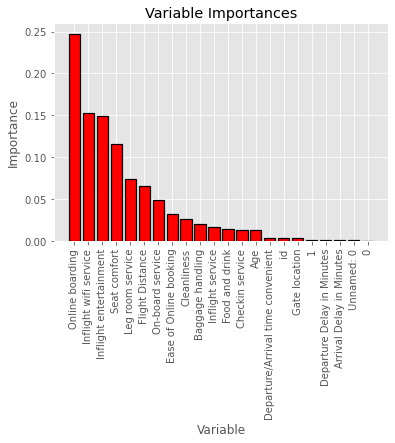

In [159]:
x_values = list(range(len(feature_importances['importance'])))
plt.bar(x_values, feature_importances['importance'], orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(x_values, feature_importances.index, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

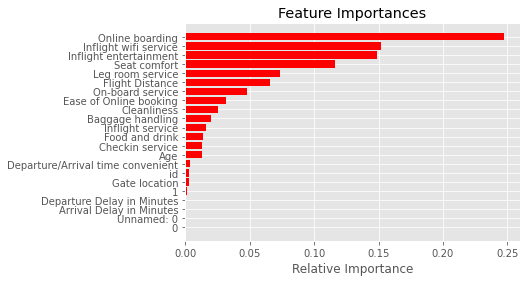

In [160]:
### Aoother way 

features = X.columns.values
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

### Tuning the parameters

#### N_estimators

Text(0.5, 0, 'n_estimators')

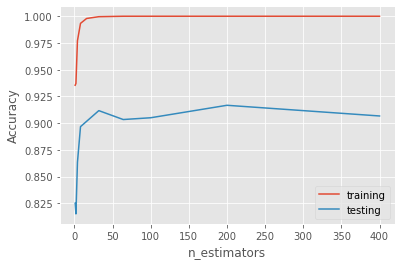

In [161]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200, 400]
tr_accuracy = []
tst_accuracy = []

tr_auc = []
tst_auc = []
for est in n_estimators:
    rf = RandomForestClassifier(n_estimators= est)
    rf.fit(X_train,y_train.values.ravel())
    tr_pred = rf.predict(X_train)
    tr_accuracy.append(accuracy_score(y_train, tr_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, tr_pred)
    roc_auc_tr = auc(false_positive_rate, true_positive_rate)
    tr_auc.append(roc_auc_tr)
    
    
    tst_pred = rf.predict(X_test)
    tst_accuracy.append(accuracy_score(y_test, tst_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, tst_pred)
    roc_auc_tst = auc(false_positive_rate, true_positive_rate)
    tst_auc.append(roc_auc_tst)

line_1, = plt.plot(n_estimators, tr_accuracy, label='training')
line_2, = plt.plot(n_estimators, tst_accuracy, label='testing')
plt.legend(handles=[line_1, line_2])
plt.ylabel('Accuracy')
plt.xlabel('n_estimators')


Text(0.5, 0, 'n_estimators')

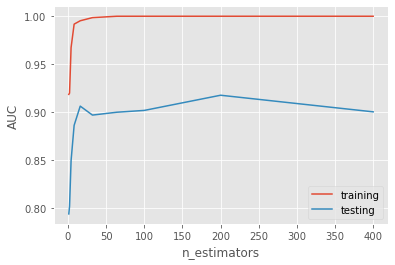

In [200]:
line_1, = plt.plot(n_estimators, tr_auc, label='training')
line_2, = plt.plot(n_estimators, tst_auc, label='testing')
plt.legend(handles=[line_1, line_2])
plt.ylabel('AUC')
plt.xlabel('n_estimators')


#### max_depth

Text(0.5, 0, 'Tree Depth')

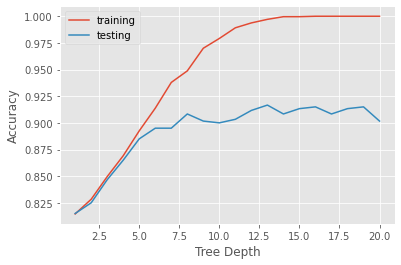

In [162]:
max_depths = np.linspace(1, 20,20, endpoint=True)

tr_accuracy = []
tst_accuracy = []

tr_auc = []
tst_auc = []
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth = max_depth)
    rf.fit(X_train,y_train.values.ravel())
    tr_pred = rf.predict(X_train)
    tr_accuracy.append(accuracy_score(y_train, tr_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, tr_pred)
    roc_auc_tr = auc(false_positive_rate, true_positive_rate)
    tr_auc.append(roc_auc_tr)
    
    
    tst_pred = rf.predict(X_test)
    tst_accuracy.append(accuracy_score(y_test, tst_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, tst_pred)
    roc_auc_tst = auc(false_positive_rate, true_positive_rate)
    tst_auc.append(roc_auc_tst)

line_1, = plt.plot(max_depths, tr_accuracy, label='training')
line_2, = plt.plot(max_depths, tst_accuracy, label='testing')
plt.legend(handles=[line_1, line_2])
plt.ylabel('Accuracy')
plt.xlabel('Tree Depth')

Text(0.5, 0, 'max_depths')

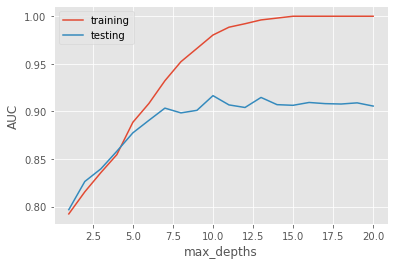

In [50]:
line_1, = plt.plot(max_depths, tr_auc, label='training')
line_2, = plt.plot(max_depths, tst_auc, label='testing')
plt.legend(handles=[line_1, line_2])
plt.ylabel('AUC')
plt.xlabel('max_depths')


#### max_features

Text(0.5, 0, 'Max features')

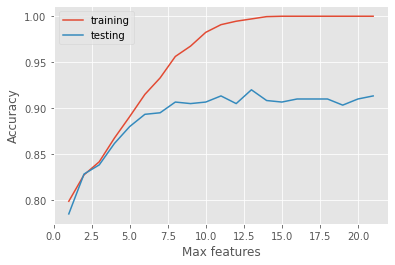

In [163]:
max_features = list(range(1,X_train.shape[1]))

tr_accuracy = []
tst_accuracy = []

tr_auc = []
tst_auc = []
for i in max_features:
    rf = RandomForestClassifier(max_depth = i)
    rf.fit(X_train,y_train.values.ravel())
    tr_pred = rf.predict(X_train)
    tr_accuracy.append(accuracy_score(y_train, tr_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, tr_pred)
    roc_auc_tr = auc(false_positive_rate, true_positive_rate)
    tr_auc.append(roc_auc_tr)
    
    
    tst_pred = rf.predict(X_test)
    tst_accuracy.append(accuracy_score(y_test, tst_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, tst_pred)
    roc_auc_tst = auc(false_positive_rate, true_positive_rate)
    tst_auc.append(roc_auc_tst)

line_1, = plt.plot(max_features, tr_accuracy, label='training')
line_2, = plt.plot(max_features, tst_accuracy, label='testing')
plt.legend(handles=[line_1, line_2])
plt.ylabel('Accuracy')
plt.xlabel('Max features')

In [164]:
tst_auc

[0.7678571428571428,
 0.8179112554112554,
 0.8308982683982684,
 0.8557900432900433,
 0.8770292207792209,
 0.8901515151515152,
 0.8916396103896104,
 0.9044913419913421,
 0.9021915584415585,
 0.9040854978354979,
 0.9104437229437229,
 0.9030032467532466,
 0.9176136363636364,
 0.9055735930735931,
 0.9036796536796537,
 0.9078733766233766,
 0.90625,
 0.9058441558441558,
 0.8998917748917749,
 0.9074675324675324,
 0.9108495670995671]

We can utilize **GridSearchCV** functionality to optimize the parameters


In [165]:
np.random.seed(123)
start = time.time()
#n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200, 400, 1000]
n_estimators = [1, 2, 4, 6, 100, 200, 500]
max_depths = (2,3,4)
boot_strap = (True, False)
min_samples_splits = [2,3,5]
min_samples_leafs = [1,5,8]
max_features = ('auto', 'sqrt', 'log2', None)
criteria = ('gini', 'entropy')
parameters = {'max_depth': max_depths,
              'bootstrap': boot_strap,
              'max_features': max_features,
              'criterion': criteria,
              'min_samples_split': min_samples_splits,
              'min_samples_leaf': min_samples_leafs
             }

rf = RandomForestClassifier(random_state=456)

#rf.fit(X_train, y_train)   # with default settings
rf_model = GridSearchCV(rf, parameters,cv = 10,n_jobs = 3)

rf_model.fit(X_train, y_train.values.ravel())
print('Best Parameters using grid search: \n', 
      rf_model.best_params_)

end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

# Set the rf to the best combination of parameters
rf = rf_model.best_estimator_

# Fit the best algorithm to the data. 
rf.fit(X_train, y_train.values.ravel())

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Time taken in grid search:  488.25


RandomForestClassifier(max_depth=4, max_features=None, random_state=456)

In [166]:
y_pred = rf.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test,y_pred))

Accuracy Score: 0.8716666666666667


#### Validate with KFold
Is this model actually any good? It helps to verify the effectiveness of the algorithm using KFold. This will split our data into 10 buckets, then run the algorithm using a different bucket as the test set for each iteration.

In [167]:
# https://www.kaggle.com/cesartrevisan/scikit-learn-and-gridsearchcv

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

def run_n_splits(rf):
    kf = KFold( n_splits=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf.split(range(len(finalpdframe))):
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        rf.fit(X_train, y_train.ravel())
        predictions = rf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome))
    std_outcome = np.std(outcomes)
    print("Std Accuracy: {0}".format(std_outcome))

    
run_n_splits(rf)

Fold 1 accuracy: 0.8666666666666667
Fold 2 accuracy: 0.8733333333333333
Fold 3 accuracy: 0.8766666666666667
Fold 4 accuracy: 0.8466666666666667
Fold 5 accuracy: 0.8833333333333333
Fold 6 accuracy: 0.89
Fold 7 accuracy: 0.8233333333333334
Fold 8 accuracy: 0.8366666666666667
Fold 9 accuracy: 0.8866666666666667
Fold 10 accuracy: 0.82
Mean Accuracy: 0.8603333333333334
Std Accuracy: 0.025141819964177445


###  Re- Fitting Model with fine tuned parameters 
# for example , we saw that after 50 , the n-estimator curve flattens 

In [168]:
rf = RandomForestClassifier(random_state=2,max_depth=3, n_estimators=50)

rf.fit(X_train, y_train.values.ravel())   # with default settings

RandomForestClassifier(max_depth=3, n_estimators=50, random_state=2)

In [169]:
# Save the model
import pickle
pickle.dump(rf,open("rf_model",'wb'))

In [170]:
# Load the model
rf_loaded = pickle.load(open('rf_model', 'rb'))
y_pred1 = rf_loaded.predict(X_test)

In [171]:
y_pred = rf.predict(X_test)

In [172]:
print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))  

print(accuracy_score(y_test, y_pred)) 

print(rf.score(X_test, y_test))

[[302  34]
 [ 61 203]]
0.8416666666666667
0.8416666666666667


In [173]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.833874458874459

In [174]:
rf.feature_importances_

array([0.00038202, 0.00527089, 0.01253076, 0.05216158, 0.12420632,
       0.00239541, 0.0213079 , 0.00509477, 0.02174066, 0.26130636,
       0.12670558, 0.14522043, 0.0422118 , 0.08269045, 0.01867221,
       0.01889991, 0.02084146, 0.03493858, 0.00047713, 0.00129613,
       0.00035781, 0.00129185])

In [241]:
import pandas as pd
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
Online boarding,0.261306
Inflight entertainment,0.145220
Seat comfort,0.126706
Inflight wifi service,0.124206
Leg room service,0.082690
Flight Distance,0.052162
On-board service,0.042212
Cleanliness,0.034939
Food and drink,0.021741
Ease of Online booking,0.021308


([<matplotlib.axis.XTick at 0x253ce43f4c0>,
 [Text(0, 0, 'Online boarding'),
  Text(1, 0, 'Inflight wifi service'),
  Text(2, 0, 'Inflight entertainment'),
  Text(3, 0, 'Seat comfort'),
  Text(4, 0, 'Leg room service'),
  Text(5, 0, 'Flight Distance'),
  Text(6, 0, 'On-board service'),
  Text(7, 0, 'Ease of Online booking'),
  Text(8, 0, 'Cleanliness'),
  Text(9, 0, 'Baggage handling'),
  Text(10, 0, 'Inflight service'),
  Text(11, 0, 'Food and drink'),
  Text(12, 0, 'Checkin service'),
  Text(13, 0, 'Age'),
  Text(14, 0, 'Departure/Arrival time convenient'),
  Text(15, 0, 'id'),
  Text(16, 0, 'Gate location'),
  Text(17, 0, '1'),
  Text(18, 0, 'Departure Delay in Minutes'),
  Text(19, 0, 'Arrival Delay in Minutes'),
  Text(20, 0, 'Unnamed: 0'),
  Text(21, 0, '0')])

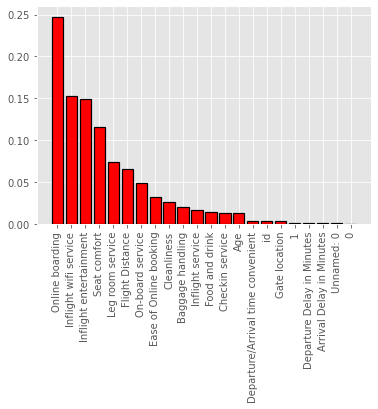

In [176]:
x_values = list(range(len(feature_importances['importance'])))
plt.bar(x_values, feature_importances['importance'], orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(x_values, feature_importances.index, rotation='vertical')
# Axis labels and title

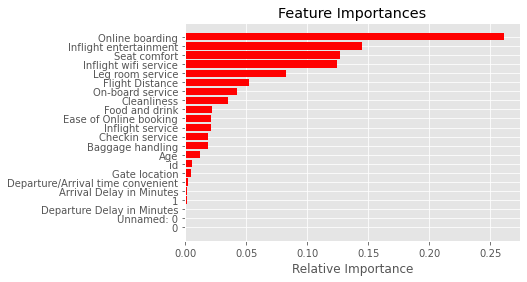

In [177]:
### Aoother way 

features = X.columns.values
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

In [178]:
tst_auc

[0.7678571428571428,
 0.8179112554112554,
 0.8308982683982684,
 0.8557900432900433,
 0.8770292207792209,
 0.8901515151515152,
 0.8916396103896104,
 0.9044913419913421,
 0.9021915584415585,
 0.9040854978354979,
 0.9104437229437229,
 0.9030032467532466,
 0.9176136363636364,
 0.9055735930735931,
 0.9036796536796537,
 0.9078733766233766,
 0.90625,
 0.9058441558441558,
 0.8998917748917749,
 0.9074675324675324,
 0.9108495670995671]

In [179]:
np.random.seed(123)
start = time.time()
#n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200, 400, 1000]
n_estimators = [1, 2, 4, 6, 100, 200, 500]
max_depths = (2,3,4)
boot_strap = (True, False)
min_samples_splits = [2,3,5]
min_samples_leafs = [1,5,8]
max_features = ('auto', 'sqrt', 'log2', None)
criteria = ('gini', 'entropy')
parameters = {'max_depth': max_depths,
              'bootstrap': boot_strap,
              'max_features': max_features,
              'criterion': criteria,
              'min_samples_split': min_samples_splits,
              'min_samples_leaf': min_samples_leafs
             }

rf = RandomForestClassifier(random_state=456)

#rf.fit(X_train, y_train)   # with default settings
rf_model = GridSearchCV(rf, parameters,cv = 10,n_jobs = 3)

rf_model.fit(X_train, y_train.values.ravel())
print('Best Parameters using grid search: \n', 
      rf_model.best_params_)

end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

# Set the rf to the best combination of parameters
rf = rf_model.best_estimator_

# Fit the best algorithm to the data. 
rf.fit(X_train, y_train.values.ravel())

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Time taken in grid search:  462.37


RandomForestClassifier(max_depth=4, max_features=None, random_state=456)

In [181]:
y_pred = rf.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test,y_pred))

Accuracy Score: 0.8716666666666667


In [182]:
# https://www.kaggle.com/cesartrevisan/scikit-learn-and-gridsearchcv

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

def run_n_splits(rf):
    kf = KFold( n_splits=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf.split(range(len(finalpdframe))):
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        rf.fit(X_train, y_train.ravel())
        predictions = rf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome))
    std_outcome = np.std(outcomes)
    print("Std Accuracy: {0}".format(std_outcome))

    
run_n_splits(rf)

Fold 1 accuracy: 0.8666666666666667
Fold 2 accuracy: 0.8733333333333333
Fold 3 accuracy: 0.8766666666666667
Fold 4 accuracy: 0.8466666666666667
Fold 5 accuracy: 0.8833333333333333
Fold 6 accuracy: 0.89
Fold 7 accuracy: 0.8233333333333334
Fold 8 accuracy: 0.8366666666666667
Fold 9 accuracy: 0.8866666666666667
Fold 10 accuracy: 0.82
Mean Accuracy: 0.8603333333333334
Std Accuracy: 0.025141819964177445


In [183]:
 from sklearn.metrics import roc_auc_score
 from sklearn.metrics import plot_confusion_matrix   
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    print("ROC_AUC = {}".format(roc_auc))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, roc_auc

ROC_AUC = 0.9085497835497836
              precision    recall  f1-score   support

           0    0.91014   0.93452   0.92217       336
           1    0.91373   0.88258   0.89788       264

    accuracy                        0.91167       600
   macro avg    0.91194   0.90855   0.91003       600
weighted avg    0.91172   0.91167   0.91148       600



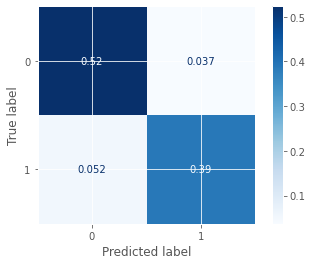

In [184]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 25,
         'min_samples_leaf': 1,
         'min_samples_split': 2,
         'n_estimators': 100,
         'random_state': 42}

model_rf = RandomForestClassifier(**params_rf)
model_rf, roc_auc_rf = run_model(model_rf, X_train, y_train.values.ravel(), X_test, y_test.values.ravel())